In [1]:
import pandas as pd
import glob
import matplotlib
#%matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib.pyplot import figure
from sklearn import preprocessing
#%matplotlib qt

# Rabies Clustering Selection

In [54]:
#df_main = pd.read_csv('Y:/V11/vM1_Ref_Frame/Outputs/Alignment_Analysis/Rabies_Density_Clustering_Evaluation.csv')
df_main = pd.read_csv('Y:/V11/vM1_Ref_Frame/Outputs/Alignment_Analysis/Rabies_Density_Clustering_rabies_cortical_surface.csv')
#df_main = pd.read_csv('Y:/V11/vM1_Ref_Frame/Outputs/Alignment_Analysis/Rabies_Clustering_Selection/Rabies_Density_Clustering_surface_without_MG49_rhs.csv')

In [61]:
df_main.columns

Index(['Unnamed: 0', 'Surf_Type', 'BR', 'Hem', 'Voxel_Size', 'Cutoff',
       'Vol_Mean_Rabies_Surface', 'Vol_Std_Rabies_Surface',
       'Vol_CoV_Rabies_Surface', 'Vol_Mean_Rabies_Surface_Cortical',
       'Vol_Std_Rabies_Surface_Cortical', 'Vol_CoV_Rabies_Surface_Cortical',
       'Vol_Overlap_Rabies_Surface', 'Landmarks_Overlap_Rabies_Surface',
       'Vol_Overlap_Rabies_Surface_Cortical',
       'Landmarks_Overlap_Rabies_Surface_Cortical',
       'Centriod_Dist_Mean_Rabies_Surface', 'Centriod_Dist_Std_Rabies_Surface',
       'Centriod_Dist_CoV_Rabies_Surface',
       'Centriod_Dist_Mean_Rabies_Surface_Cortical',
       'Centriod_Dist_Std_Rabies_Surface_Cortical',
       'Centriod_Dist_CoV_Rabies_Surface_Cortical',
       'Centriod_Rabies_Dist_Mean', 'Centriod_Rabies_Dist_Std',
       'Centriod_Rabies_Dist_CoV', 'Rabies_Landmarks_Ratio',
       'Aligned_Volume_Ratio_Rabies', 'Aligned_Volume_Ratio_Rabies_Cortical'],
      dtype='object')

C:\Users\Seetharama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\Seetharama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\Seetharama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
C:\Users\Seetharama\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped er

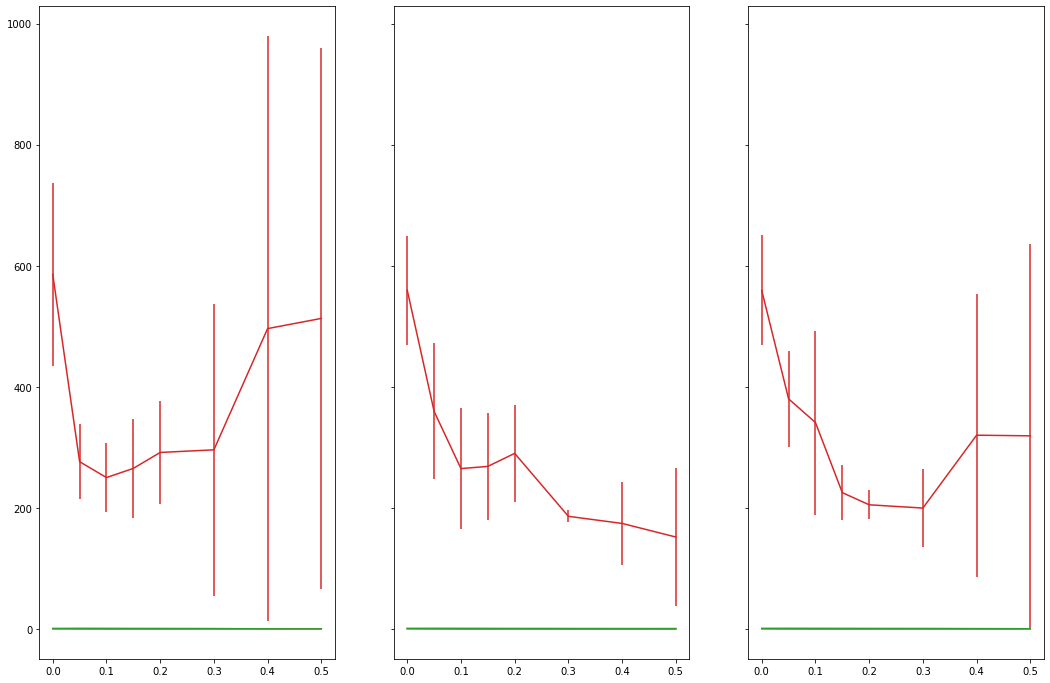

In [62]:
#fig, axes = plt.subplots(nrows=1, ncols=1,figsize=[10.10])
fig, axes = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=(18,12))
cutoffs = [0,0.05,0.1,0.15,0.2,0.3,0.4,0.5]
colors = ['red','green','blue']
i=0
for surf_res in [400,450,500]:
    land_overlap_means = []
    Vol_CoV_means = []
    Centriod_Rabies_Dist_Mean_means = []
    Rabies_Landmarks_Ratio_means = []

    land_overlap_stds = []
    Vol_CoV_stds = []
    Centriod_Rabies_Dist_Mean_stds = []
    Rabies_Landmarks_Ratio_stds = []
    df = df_main[(df_main['Surf_Type']=='Rabies_Cortical_Surface') & (df_main['Voxel_Size']==surf_res) & (df_main['BR']=='vM1')]#\
                 #~((df_main['Hem']=='rhs')&(df_main['BR']!='vS1')) ]
    for cutoff in [0,0.05,0.1,0.15,0.2,0.3,0.4,0.5]:
        land_overlap_means.append(df[df['Cutoff']==cutoff].mean()[['Landmarks_Overlap_Rabies_Surface']].values)
        land_overlap_stds.append(df[df['Cutoff']==cutoff].std()[['Landmarks_Overlap_Rabies_Surface']].values)

        Vol_CoV_means.append((df[df['Cutoff']==cutoff].mean()[['Vol_CoV_Rabies_Surface']].values))
        Vol_CoV_stds.append((df[df['Cutoff']==cutoff].std()[['Vol_CoV_Rabies_Surface']].values))

        Centriod_Rabies_Dist_Mean_means.append(df[df['Cutoff']==cutoff].mean()[['Centriod_Rabies_Dist_Mean']].values)
        Centriod_Rabies_Dist_Mean_stds.append(df[df['Cutoff']==cutoff].std()[['Centriod_Rabies_Dist_Mean']].values)

        Rabies_Landmarks_Ratio_means.append(df[df['Cutoff']==cutoff].mean()[['Rabies_Landmarks_Ratio']].values)
        Rabies_Landmarks_Ratio_stds.append(df[df['Cutoff']==cutoff].std()[['Rabies_Landmarks_Ratio']].values)
        #land_overlap_stds.append(df[df['Cutoff']==cutoff].std()[['Landmarks_Overlap']].values)

    #plt.plot(land_overlap_means+Vol_CoV_means)
    #plt.plot(Vol_CoV_means)
    #plt.plot(Centriod_Rabies_Dist_Mean_means)
    #plt.plot(Rabies_Landmarks_Ratio_means)
    axes[i].errorbar(cutoffs,Vol_CoV_means,yerr=Vol_CoV_stds,label=str(surf_res),mec=colors[i],mfc=colors[i])
    axes[i].errorbar(cutoffs,land_overlap_means,yerr=land_overlap_stds,label=str(surf_res),mec=colors[i],mfc=colors[i])
    axes[i].errorbar(cutoffs,Rabies_Landmarks_Ratio_means,yerr=Rabies_Landmarks_Ratio_stds,label=str(surf_res),mec=colors[i],mfc=colors[i])
    axes[i].errorbar(cutoffs,Centriod_Rabies_Dist_Mean_means,yerr=Centriod_Rabies_Dist_Mean_stds,label=str(surf_res),mec=colors[i],mfc=colors[i])
    i = i+1
#axes.legend()
#plt.errorbar(cutoffs,Centriod_Rabies_Dist_Mean_means,yerr=Centriod_Rabies_Dist_Mean_stds)
#plt.errorbar(cutoffs,Rabies_Landmarks_Ratio_means,yerr=Rabies_Landmarks_Ratio_stds)

In [59]:
#for voxel_size in [500]:
#    for cutoff in [0.05]:
    #for surf_type in ['Rabies_Surface']:#['Rabies_Surface','Largest_Rabies_Surface','Rabies_Delunay_Surface','Largest_Rabies_Delunay_Surface']:
    #    for br in ['vM1','vS1']:
    #        for hem in ['lhs','rhs']:

                #lhs_m1 = df_main[(df_main['Hem']==hem) & (df_main['BR']==br) & (df_main['Surf_Type']==surf_type) ]
                                 #(df_main['Rabies_Landmarks_Ratio'] > 0.75) ]
        #if not ((br=='vS1')and(hem=='rhs')):
#print(df[(df['Voxel_Size']==500)&(df['Cutoff']==0.0)].mean()[['Vol_Overlap','Landmarks_Overlap','Vol_CoV','Centriod_Dist_Mean','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
df = df_main[(df_main['Surf_Type']=='Rabies_Cortical_Surface')  & (df_main['BR']=='vM1') ]
                # ~((df_main['Hem']=='rhs')&(df_main['BR']!='vS1')) ]
print('\n100%\n')
print(df[(df['Voxel_Size']==500)&(df['Cutoff']==0.0)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==450)&(df['Cutoff']==0.0)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==400)&(df['Cutoff']==0.0)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])

print('\n95%\n')

print(df[(df['Voxel_Size']==500)&(df['Cutoff']==0.05)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==450)&(df['Cutoff']==0.05)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==400)&(df['Cutoff']==0.05)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])

print('\n90%\n')
print(df[(df['Voxel_Size']==500)&(df['Cutoff']==0.1)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==450)&(df['Cutoff']==0.1)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==400)&(df['Cutoff']==0.1)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])

print('\n85%\n')
print(df[(df['Voxel_Size']==500)&(df['Cutoff']==0.15)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==450)&(df['Cutoff']==0.15)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==400)&(df['Cutoff']==0.15)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])

print('\n80%\n')
print(df[(df['Voxel_Size']==500)&(df['Cutoff']==0.2)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==450)&(df['Cutoff']==0.2)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])
print(df[(df['Voxel_Size']==400)&(df['Cutoff']==0.2)].mean()[['Vol_Overlap_Rabies_Surface_Cortical','Landmarks_Overlap_Rabies_Surface_Cortical','Vol_CoV_Rabies_Surface','Centriod_Dist_Mean_Rabies_Surface','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']])




100%

Vol_Overlap_Rabies_Surface_Cortical            0.344995
Landmarks_Overlap_Rabies_Surface_Cortical      0.919912
Vol_CoV_Rabies_Surface                         0.414720
Centriod_Dist_Mean_Rabies_Surface            359.661110
Centriod_Rabies_Dist_Mean                    559.290431
Rabies_Landmarks_Ratio                         0.990650
dtype: float64
Vol_Overlap_Rabies_Surface_Cortical            0.345362
Landmarks_Overlap_Rabies_Surface_Cortical      0.920212
Vol_CoV_Rabies_Surface                         0.464278
Centriod_Dist_Mean_Rabies_Surface            367.557408
Centriod_Rabies_Dist_Mean                    559.788203
Rabies_Landmarks_Ratio                         0.990933
dtype: float64
Vol_Overlap_Rabies_Surface_Cortical            0.299764
Landmarks_Overlap_Rabies_Surface_Cortical      0.858693
Vol_CoV_Rabies_Surface                         0.494594
Centriod_Dist_Mean_Rabies_Surface            460.524560
Centriod_Rabies_Dist_Mean                    585.855854
Rabies_Land

In [ ]:


for surf_type in ['Rabies_Surface']:#['Rabies_Surface','Largest_Rabies_Surface','Rabies_Delunay_Surface','Largest_Rabies_Delunay_Surface']:
    for br in ['vM1','vS1']:
        for hem in ['lhs','rhs']:
        
            lhs_m1 = df_main[(df_main['Hem']==hem) & (df_main['BR']==br) & (df_main['Surf_Type']==surf_type) & \
                             (df_main['Rabies_Landmarks_Ratio'] > 0.75) ]
            
            x = lhs_m1.values #returns a numpy array
            min_max_scaler = preprocessing.MinMaxScaler()
            x_scaled = min_max_scaler.fit_transform(x)
            df_rescaled = pd.DataFrame(x_scaled)
            
            #lhs_m1['Rabies_Landmarks_Ratio'] > 0.5
            #if lhs_m1['Rabies_Landmarks_Ratio'] > 0.5:
            #print(lhs_m1[lhs_m1['Centriod_Dist_Mean']==lhs_m1['Centriod_Dist_Mean'].min()])
            print(lhs_m1[(lhs_m1['Voxel_Size']==400) & (lhs_m1['Cutoff']==0.0)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']].values)
            print(lhs_m1[(lhs_m1['Voxel_Size']==400) & (lhs_m1['Cutoff']==0.05)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']].values)
            print(lhs_m1[(lhs_m1['Voxel_Size']==400) & (lhs_m1['Cutoff']==0.1)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']].values)
            print(lhs_m1[(lhs_m1['Voxel_Size']==400) & (lhs_m1['Cutoff']==0.15)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']].values)

            print('\n')

            print(lhs_m1[(lhs_m1['Voxel_Size']==500) & (lhs_m1['Cutoff']==0.0)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']].values)
            print(lhs_m1[(lhs_m1['Voxel_Size']==500) & (lhs_m1['Cutoff']==0.05)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']].values)
            print(lhs_m1[(lhs_m1['Voxel_Size']==500) & (lhs_m1['Cutoff']==0.1)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']].values)
            print(lhs_m1[(lhs_m1['Voxel_Size']==500) & (lhs_m1['Cutoff']==0.15)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean','Rabies_Landmarks_Ratio']].values)

            print('\n')
            print('\n')

In [ ]:
for surf_type in ['Rabies_Surface']:#['Rabies_Surface','Largest_Rabies_Surface','Rabies_Delunay_Surface','Largest_Rabies_Delunay_Surface']:
    for br in ['vM1','vS1']:
        for hem in ['lhs','rhs']:
        
            lhs_m1 = df_main[(df_main['Hem']==hem) & (df_main['BR']==br) & (df_main['Surf_Type']==surf_type)]
            #print(lhs_m1[lhs_m1['Centriod_Dist_Mean']==lhs_m1['Centriod_Dist_Mean'].min()])
            lhs_m1[]
            print(lhs_m1[(lhs_m1['Voxel_Size']==400) & (lhs_m1['Cutoff']==0.0)]\
                  [['Vol_Overlap','Vol_CoV','Landmarks_Overlap','Centriod_Rabies_Dist_Mean']].values)

# Surface Resolutions

In [ ]:
input_path = 'Y:/V11/vM1_Ref_Frame/Outputs/Alignment_Analysis/Surface_Resolution_Selection/'

In [ ]:
#df_surf = pd.read_csv(input_path+'Resolution_Selection_Stats.csv')
df_surf = pd.read_csv(input_path+'Alignmen_Stats.csv')

In [ ]:
def get_surf_selection_error(df,res_used,present_res):
    df_align = df[df['Aligned_Using_Surf_Resolution']==res_used]
    df_surf_type = df_align[df_align['Present_Surf_Resolution']==present_res]
    pia_mean = df_surf_type['Pia_Mean_Dist_3D'].mean()
    wm_mean = df_surf_type['WM_Mean_Dist_3D'].mean()
    pia_std = df_surf_type['Pia_STD_Dist_3D'].mean()
    wm_std = df_surf_type['WM_STD_Dist_3D'].mean()
    
    return (pia_mean+wm_mean)/2,(pia_std+wm_std)/2

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=1, sharex=False,sharey=True,figsize=(8,8))
for res_used in [50,100,200,300,400,450,500]:
    mean,std = get_surf_selection_error(df_surf,res_used,50)
    print(mean,std)
    plt.bar(str(res_used),mean,yerr=std)
#axs.set(ylabel='Surface_Misalignment in micro meters')
#axs.set(xlabel='Voxel size of surface mesh')

# Find Global Alignemnt methods

In [13]:
df =pd.read_csv('Y:/V11/vM1_Ref_Frame/Outputs/Alignment_Analysis/Global_Alignment_stats.csv')

## Precision of Centers and pia/wm

wb_center_err_mean 315.31437626162534
vs1_center_err_mean 1148.1477258183
alignment method  Using_Surface  overall precision mean  475  overall precision std  126
wb_center_err_mean 1008.703355717172
vs1_center_err_mean 417.69272054443235
alignment method  Using_Local_Centers  overall precision mean  478  overall precision std  157
wb_center_err_mean 487.79738037101544
vs1_center_err_mean 575.3544955251637
alignment method  Using_Local_Rabies_Surfaces  overall precision mean  315  overall precision std  88
wb_center_err_mean 484.3939563723736
vs1_center_err_mean 609.5980725961547
alignment method  Using_Local_Surfaces  overall precision mean  377  overall precision std  115
wb_center_err_mean 728.8179086994116
vs1_center_err_mean 706.2815299019211
alignment method  Using_M1_SBF  overall precision mean  463  overall precision std  229


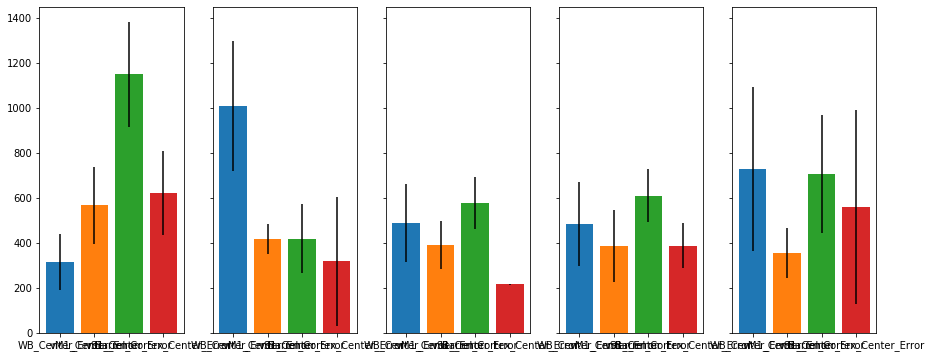

In [14]:
#figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(nrows=1,ncols=5, sharex=False,sharey=True,figsize=(15,6))
i = 0
for align_type in ['Using_Surface','Using_Local_Centers','Using_Local_Rabies_Surfaces','Using_Local_Surfaces',\
                   'Using_M1_SBF']:
    
    ############### center and pia wm errors for wb, m1, s1 and barrels#################################
    precision_means = []
    precision_stds = []
    wb_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Surf_Center_Precision_Mean'].mean()
    wb_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Surf_Center_Precision_Std'].mean()
    precision_means.append(wb_center_err_mean)
    precision_stds.append(wb_center_err_std)
    print('wb_center_err_mean',wb_center_err_mean)
    
    vs1_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Surf_Center_Precision_Mean'].mean()
    vs1_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Surf_Center_Precision_Std'].mean()
    precision_means.append(vs1_center_err_mean)
    precision_stds.append(vs1_center_err_std)
    print('vs1_center_err_mean',vs1_center_err_mean)
    
    vm1_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Surf_Center_Precision_Mean'].mean()
    vm1_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Surf_Center_Precision_Std'].mean()
    precision_means.append(vm1_center_err_mean)
    precision_stds.append(vm1_center_err_std)
    
    wb_pia_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Pia_Precision_Mean'].mean()
    wb_pia_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Pia_Precision_Std'].mean()
    precision_means.append(wb_pia_err_mean)
    precision_stds.append(wb_pia_err_std)
    
    vs1_pia_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Pia_Precision_Mean'].mean()
    vs1_pia_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Pia_Precision_Std'].mean()
    precision_means.append(vs1_pia_err_mean)
    precision_stds.append(vs1_pia_err_std)
    
    vm1_pia_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Pia_Precision_Mean'].mean()
    vm1_pia_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Pia_Precision_Std'].mean()
    precision_means.append(vm1_pia_err_mean)
    precision_stds.append(vm1_pia_err_std)
    
    wb_wm_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['WM_Precision_Mean'].mean()
    wb_wm_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['WM_Precision_Std'].mean()
    precision_means.append(wb_wm_err_mean)
    precision_stds.append(wb_wm_err_std)
    
    vs1_wm_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['WM_Precision_Mean'].mean()
    vs1_wm_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['WM_Precision_Std'].mean()
    precision_means.append(vs1_wm_err_mean)
    precision_stds.append(vs1_wm_err_std)
    
    vm1_wm_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['WM_Precision_Mean'].mean()
    vm1_wm_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['WM_Precision_Std'].mean()
    precision_means.append(vm1_wm_err_mean)
    precision_stds.append(vm1_wm_err_std)
    
    bc_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Barrel_Cortex_Center_Precision_Mean'].mean()
    bc_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Barrel_Cortex_Center_Precision_Mean'].std()
    precision_means.append(bc_center_err_mean)
    precision_stds.append(bc_center_err_std)
    
    bc_pia_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Barrels_Pia_Precision_Mean'].mean()
    bc_pia_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Barrels_Pia_Precision_Mean'].std()
    precision_means.append(bc_pia_err_mean)
    precision_stds.append(bc_pia_err_std)
    
    bc_wm_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Barrels_WM_Precision_Mean'].mean()
    bc_wm_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Barrels_WM_Precision_Mean'].std()
    precision_means.append(bc_wm_err_mean)
    precision_stds.append(bc_wm_err_std)
    
    overall_mean = np.array(precision_means).mean(axis=0)
    overall_std = np.array(precision_stds).mean(axis=0)
    
    print('alignment method ',align_type,' overall precision mean ',int(overall_mean),' overall precision std ',int(overall_std))
    
    
    axs[i].bar('WB_Center_Error',wb_center_err_mean,yerr=wb_center_err_std,)
    #axs[i].bar('WB_Pia_Error',wb_pia_err_mean,yerr=wb_pia_err_std)
    #axs[i].bar('WB_WM_Error',wb_wm_err_mean,yerr=wb_wm_err_std)
    
    #axs[i].bar('',0,yerr=0)
    
    axs[i].bar('vM1_Center_Error',vm1_center_err_mean,yerr=vm1_center_err_std,)
    #axs[i].bar('vM1_Pia_Error',vm1_pia_err_mean,yerr=vm1_pia_err_mean)
    #axs[i].bar('vM1_WM_Error',vm1_wm_err_mean,yerr=vm1_wm_err_mean)
    
    #axs[i].bar('',0,yerr=0)
    
    axs[i].bar('vS1_Center_Error',vs1_center_err_mean,yerr=vs1_center_err_std,)
    #axs[i].bar('vS1_Pia_Error',vs1_pia_err_mean,yerr=vs1_pia_err_mean)
    #axs[i].bar('vS1_WM_Error',vs1_wm_err_mean,yerr=vs1_wm_err_mean)
    
    axs[i].bar('Barrel_Cortex_Center_Error',bc_center_err_mean,yerr=bc_center_err_std,)
    #axs[i].bar('Barrels_Pia_Error',bc_pia_err_mean,yerr=bc_pia_err_std)
    #axs[i].bar('Barrels_WM_Error',bc_wm_err_mean,yerr=bc_wm_err_std)
    
    #for ax in axs.flat:
    #axs[i].set( xlabel=align_type)
    
    
    
    i = i +1

#plt.savefig(input_path+'global_alignments.eps',format='eps')
#plt.savefig(input_path+'global_alignments.jpg',format='jpg')

## Precision of Orientation

alignment method  Using_Surface  overall precision mean  17  overall precision std  6
alignment method  Using_Local_Centers  overall precision mean  19  overall precision std  8
alignment method  Using_Local_Rabies_Surfaces  overall precision mean  13  overall precision std  5
alignment method  Using_Local_Surfaces  overall precision mean  14  overall precision std  6
alignment method  Using_M1_SBF  overall precision mean  15  overall precision std  6


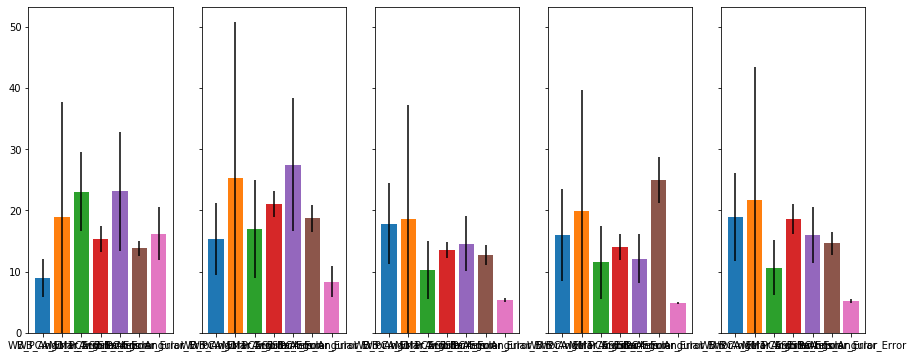

In [15]:
#figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
fig, axs = plt.subplots(nrows=1,ncols=5, sharex=False,sharey=True,figsize=(15,6))
i = 0
for align_type in ['Using_Surface','Using_Local_Centers','Using_Local_Rabies_Surfaces','Using_Local_Surfaces',\
                   'Using_M1_SBF']:
    
    ############### Orientation for wb, m1, s1 and barrels#################################
    angular_precision_means = []
    angular_precision_stds = []
    
    wb_pca_angular_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['PCA_Angular_Precision_Mean'].mean()
    wb_pca_angular_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['PCA_Angular_Precision_Std'].mean()
    angular_precision_means.append(wb_pca_angular_err_mean)
    angular_precision_stds.append(wb_pca_angular_err_std)
    wb_angular_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Angular_Precision_Mean'].mean()
    wb_angular_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Angular_Precision_Mean'].mean()
    angular_precision_means.append(wb_angular_err_mean)
    angular_precision_stds.append(wb_angular_err_std)
    #print('wb_angular_err_mean',wb_center_err_mean)
    
    vm1_pca_angular_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['PCA_Angular_Precision_Mean'].mean()
    vm1_pca_angular_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['PCA_Angular_Precision_Std'].mean()
    angular_precision_means.append(vm1_pca_angular_err_mean)
    angular_precision_stds.append(vm1_pca_angular_err_std)
    vm1_angular_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Angular_Precision_Mean'].mean()
    vm1_angular_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Angular_Precision_Std'].mean()
    angular_precision_means.append(vm1_angular_err_mean)
    angular_precision_stds.append(vm1_angular_err_std)
    
    vs1_pca_angular_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['PCA_Angular_Precision_Mean'].mean()
    vs1_pca_angular_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['PCA_Angular_Precision_Std'].mean()
    angular_precision_means.append(vs1_pca_angular_err_mean)
    angular_precision_stds.append(vs1_pca_angular_err_std)
    vs1_angular_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Angular_Precision_Mean'].mean()
    vs1_angular_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Angular_Precision_Std'].mean()
    angular_precision_means.append(vs1_angular_err_mean)
    angular_precision_stds.append(vs1_angular_err_std)
    #print('vs1_center_err_mean',vs1_center_err_mean)
        
    barrels_angular_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Barrels_Angular_Precision_Mean'].mean()
    barrels_angular_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Barrels_Angular_Precision_Std'].mean()
    angular_precision_means.append(barrels_angular_err_mean)
    angular_precision_stds.append(barrels_angular_err_std)
    
    overall_angular_precision_means = np.array(angular_precision_means).mean(axis=0)
    overall_angular_precision_stds = np.array(angular_precision_stds).mean(axis=0)
    
    print('alignment method ',align_type,' overall precision mean ',int(overall_angular_precision_means),\
          ' overall precision std ',int(overall_angular_precision_stds))
    
    axs[i].bar('WB_PCA_Error',wb_pca_angular_err_mean,yerr=wb_pca_angular_err_std,)
    axs[i].bar('WB_Angular_Error',wb_angular_err_mean,yerr=wb_angular_err_std)
    #axs[i].bar('WB_WM_Error',wb_wm_err_mean,yerr=wb_wm_err_std)
    
    #axs[i].bar('',0,yerr=0)
    
    axs[i].bar('vM1_PCA_Error',vm1_pca_angular_err_mean,yerr=vm1_pca_angular_err_std,)
    axs[i].bar('vM1_Angular_Error',vm1_angular_err_mean,yerr=vm1_angular_err_std)
    #axs[i].bar('vM1_WM_Error',vm1_wm_err_mean,yerr=vm1_wm_err_mean)
    
    #axs[i].bar('',0,yerr=0)
    
    axs[i].bar('vS1_PCA_Error',vs1_pca_angular_err_mean,yerr=vs1_pca_angular_err_std,)
    axs[i].bar('vS1_Angular_Error',vs1_angular_err_mean,yerr=vs1_angular_err_std)
    #axs[i].bar('vS1_WM_Error',vs1_wm_err_mean,yerr=vs1_wm_err_mean)
    
    axs[i].bar('Barrels_Angular_Error',barrels_angular_err_mean,yerr=barrels_angular_err_std,)
    #axs[i].bar('vS1_Angular_Error',vs1_angular_err_mean,yerr=vs1_angular_err_std)
    #axs[i].bar('Barrels_WM_Error',bc_wm_err_mean,yerr=bc_wm_err_std)
    
    #for ax in axs.flat:
    #axs[i].set( xlabel=align_type)
    
    
    
    i = i +1

#plt.savefig(input_path+'global_alignments.eps',format='eps')
#plt.savefig(input_path+'global_alignments.jpg',format='jpg')

## Precision of overlap

overall overlap for  Using_Surface   0.32906969573189976
overall overlap for  Using_Local_Centers   0.3402653790043787
overall overlap for  Using_Local_Rabies_Surfaces   0.40208946361762543
overall overlap for  Using_Local_Surfaces   0.3875268055069042
overall overlap for  Using_M1_SBF   0.4216656310206213


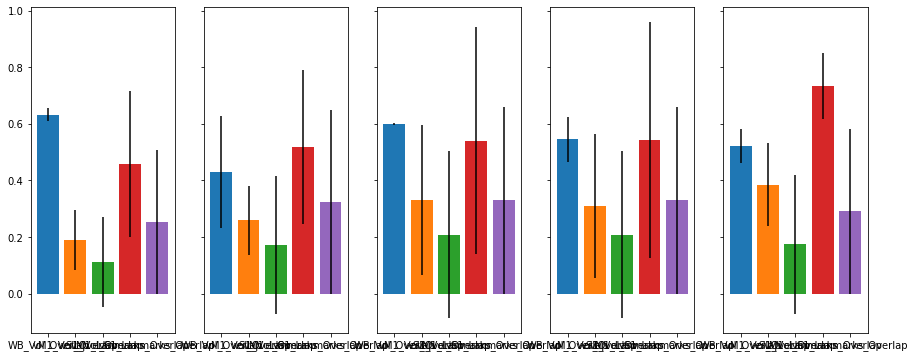

In [16]:
fig, axs = plt.subplots(nrows=1,ncols=5, sharex=False,sharey=True,figsize=(15,6))
i = 0
for align_type in ['Using_Surface','Using_Local_Centers','Using_Local_Rabies_Surfaces','Using_Local_Surfaces',\
                   'Using_M1_SBF']:
    
    ############### Overlap for wb, m1, s1 and barrels#################################
    
    wb_vol_ovelap_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Volume_Overlap_Percentage'].mean()
    wb_vol_ovelap_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Volume_Overlap_Percentage'].std()
    
    vm1_vol_ovelap_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Volume_Overlap_Percentage'].mean()
    vm1_vol_ovelap_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Volume_Overlap_Percentage'].std()
    
    vs1_vol_ovelap_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Volume_Overlap_Percentage'].mean()
    vs1_vol_ovelap_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Volume_Overlap_Percentage'].std()
    
    vm1_landmarks_ovelap_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Rabies_Landmarks_Overlap_Percentage'].mean()
    vm1_landmarks_ovelap_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Rabies_Landmarks_Overlap_Percentage'].std()
    
    vs1_landmarks_ovelap_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Rabies_Landmarks_Overlap_Percentage'].mean()
    vs1_landmarks_ovelap_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Rabies_Landmarks_Overlap_Percentage'].mean()
    
    overall_overlap = (wb_vol_ovelap_mean + vm1_vol_ovelap_mean+vs1_vol_ovelap_mean+vm1_landmarks_ovelap_mean+vs1_landmarks_ovelap_mean)/5
    print('overall overlap for ', align_type, ' ',overall_overlap)
    axs[i].bar('WB_Vol_Overlap',wb_vol_ovelap_mean,yerr=wb_vol_ovelap_std,)
    axs[i].bar('vM1_Vol_Overlap',vm1_vol_ovelap_mean,yerr=vm1_vol_ovelap_std,)
    axs[i].bar('vS1_Vol_Overlap',vs1_vol_ovelap_mean,yerr=vs1_vol_ovelap_std,)
    axs[i].bar('vM1_Lanmarks_Overlap',vm1_landmarks_ovelap_mean,yerr=vm1_landmarks_ovelap_std,)
    axs[i].bar('vS1_Lanmarks_Overlap',vs1_landmarks_ovelap_mean,yerr=vs1_landmarks_ovelap_std,)
    
    i=i+1
    

# Find Best Barrel Alignment Method

In [17]:
df = pd.read_csv('Y:/V11/vM1_Ref_Frame/Outputs/Alignment_Analysis/S1BF_stats.csv')
#df.columns

overall_mean using  Use_Barrels_Alone   98.61381451686219 +- 33.189884663292226
overall_mean using  Use_Projections_Alone   82.44916904102577 +- 21.39094665559175
overall_mean using  Use_Both   81.93364080388558 +- 18.963768799583217


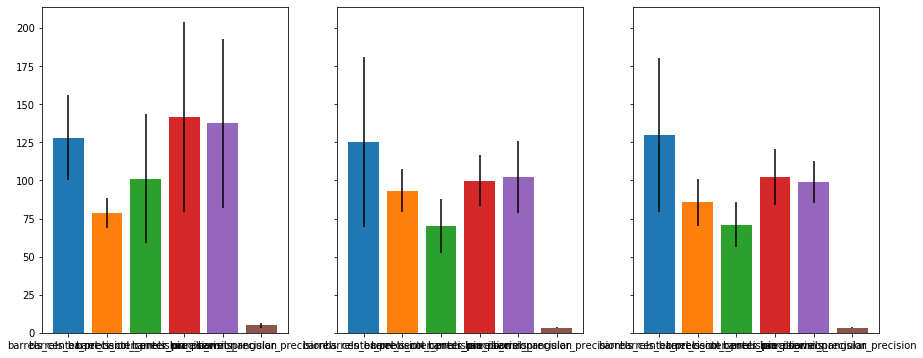

In [18]:
fig, axs = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=(15,6))
i = 0
for align_type in ['Use_Barrels_Alone','Use_Projections_Alone','Use_Both']:
    # 
    overall_means = []
    overall_stds = []
    barrels_center_precision_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrel_Cortex_Center_Precision_Mean'].mean()
    barrels_center_precision_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrel_Cortex_Center_Precision_Mean'].std()
    overall_means.append(barrels_center_precision_mean)
    overall_stds.append(barrels_center_precision_std)
    
    barrels_barrel_center_precision_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_Barrel_Center_Precision_Mean'].mean()
    barrels_barrel_center_precision_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_Barrel_Center_Precision_Mean'].std()
    overall_means.append(barrels_barrel_center_precision_mean)
    overall_stds.append(barrels_barrel_center_precision_std)
    
    barrels_col_center_precision_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_Column_Center_Precision_Mean'].mean()
    barrels_col_center_precision_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_Column_Center_Precision_Mean'].std()
    overall_means.append(barrels_col_center_precision_mean)
    overall_stds.append(barrels_col_center_precision_std)
    
    barrels_pia_precision_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_Pia_Precision_Mean'].mean()
    barrels_pia_precision_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_Pia_Precision_Mean'].std()
    overall_means.append(barrels_pia_precision_mean)
    overall_stds.append(barrels_pia_precision_std)
    
    barrels_wm_precision_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_WM_Precision_Mean'].mean()
    barrels_wm_precision_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_WM_Precision_Mean'].std()
    overall_means.append(barrels_wm_precision_mean)
    overall_stds.append(barrels_wm_precision_std)
    
    barrels_angular_precision_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_Angular_Precision_Mean'].mean()
    barrels_angular_precision_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='WB') ]['Barrels_Angular_Precision_Mean'].std()
    overall_means.append(barrels_angular_precision_mean)
    overall_stds.append(barrels_angular_precision_std)
    
    overall_mean = np.array(overall_means).mean(axis=0)
    overall_std = np.array(overall_stds).mean(axis=0)
    
    print('overall_mean using ',align_type, ' ',overall_mean,'+-',overall_std)
    
    axs[i].bar('barrels_center_precision',barrels_center_precision_mean,yerr=barrels_center_precision_std,)
    axs[i].bar('barrels_barrel_center_precision',barrels_barrel_center_precision_mean,yerr=barrels_barrel_center_precision_std,)
    axs[i].bar('barrels_col_center_precision',barrels_col_center_precision_mean,yerr=barrels_col_center_precision_std,)
    axs[i].bar('barrels_pia_precision',barrels_pia_precision_mean,yerr=barrels_pia_precision_std,)
    axs[i].bar('barrels_wm_precision',barrels_wm_precision_mean,yerr=barrels_wm_precision_std,)
    axs[i].bar('barrels_angular_precision',barrels_angular_precision_mean,yerr=barrels_angular_precision_std,)
    
    i = i+1

# Find Best vM1 Precision method

In [19]:
df = pd.read_csv('Y:/V11/vM1_Ref_Frame/Outputs/Alignment_Analysis/vM1_stats.csv')
#df.columns

## Center Precision

alignment method  Using_Center  overall precision mean  195  overall precision std  62
alignment method  Using_Rabies_Surface  overall precision mean  206  overall precision std  53
alignment method  Using_Surface  overall precision mean  236  overall precision std  70


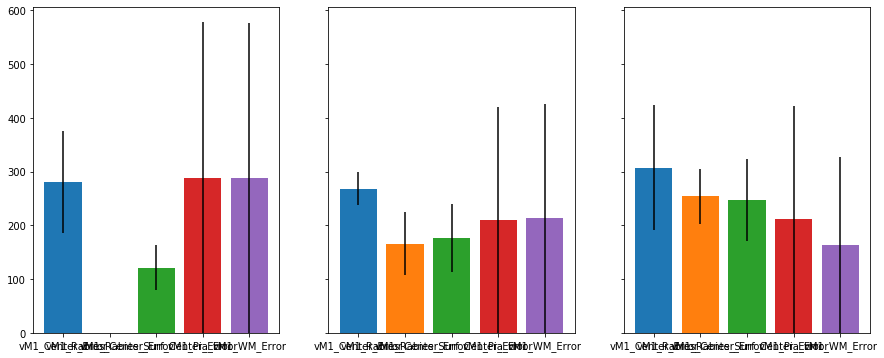

In [20]:
fig, axs = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=(15,6))
i = 0
for align_type in ['Using_Center','Using_Rabies_Surface','Using_Surface',]:
    
    ############### center and pia wm errors for wb, m1, s1 and barrels#################################
    precision_means = []
    precision_stds = []
    
    vm1_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Surf_Center_Precision_Mean'].mean()
    vm1_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Surf_Center_Precision_Std'].mean()
    precision_means.append(vm1_center_err_mean)
    precision_stds.append(vm1_center_err_std)
    
    vm1_rabies_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Rabies_Center_Precision_Mean'].mean()
    vm1_rabies_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Rabies_Center_Precision_Std'].mean()
    precision_means.append(vm1_rabies_center_err_mean)
    precision_stds.append(vm1_rabies_center_err_std)
    
    vm1_rabies_surf_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Rabies_Surf_Center_Dists_Mean'].mean()
    vm1_rabies_surf_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Rabies_Surf_Center_Dists_Std'].mean()
    precision_means.append(vm1_rabies_surf_center_err_mean)
    precision_stds.append(vm1_rabies_surf_center_err_std)
    
    
    vm1_pia_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Pia_Precision_Mean'].mean()
    vm1_pia_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['Pia_Precision_Std'].mean()
    precision_means.append(vm1_pia_err_mean)
    precision_stds.append(vm1_pia_err_std)
    
    
    vm1_wm_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['WM_Precision_Mean'].mean()
    vm1_wm_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vM1') ]['WM_Precision_Std'].mean()
    precision_means.append(vm1_wm_err_mean)
    precision_stds.append(vm1_wm_err_std)
    
        
    overall_mean = np.array(precision_means).mean(axis=0)
    overall_std = np.array(precision_stds).mean(axis=0)
    
    print('alignment method ',align_type,' overall precision mean ',int(overall_mean),' overall precision std ',int(overall_std))
    
    
    axs[i].bar('vM1_Center_Error',vm1_center_err_mean,yerr=vm1_center_err_std,)
    axs[i].bar('vM1_Rabies_Center_Error',vm1_rabies_center_err_mean,yerr=vm1_rabies_center_err_std,)
    axs[i].bar('vM1_Rabies_Surf_Center_Error',vm1_rabies_surf_center_err_mean,yerr=vm1_rabies_surf_center_err_std,)
    axs[i].bar('vM1_Pia_Error',vm1_pia_err_mean,yerr=vm1_pia_err_mean)
    axs[i].bar('vM1_WM_Error',vm1_wm_err_mean,yerr=vm1_wm_err_mean)
    
    i = i +1


# vS1 precison selection

In [21]:
df = pd.read_csv('Y:/V11/vM1_Ref_Frame/Outputs/Alignment_Analysis/vS1_stats.csv')


alignment method  Using_Center  overall precision mean  243  overall precision std  81
alignment method  Using_Rabies_Surface  overall precision mean  244  overall precision std  83
alignment method  Using_Surface  overall precision mean  335  overall precision std  124


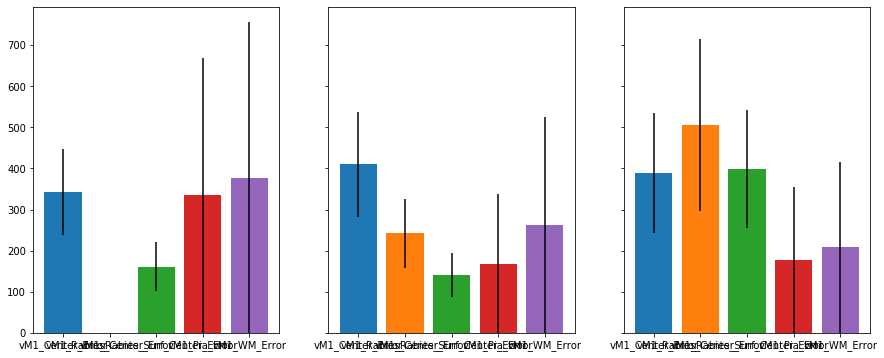

In [22]:
fig, axs = plt.subplots(nrows=1,ncols=3, sharex=False,sharey=True,figsize=(15,6))
i = 0
for align_type in ['Using_Center','Using_Rabies_Surface','Using_Surface',]:
    
    ############### center and pia wm errors for wb, m1, s1 and barrels#################################
    precision_means = []
    precision_stds = []
    
    vm1_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Surf_Center_Precision_Mean'].mean()
    vm1_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Surf_Center_Precision_Std'].mean()
    precision_means.append(vm1_center_err_mean)
    precision_stds.append(vm1_center_err_std)
    
    vm1_rabies_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Rabies_Center_Precision_Mean'].mean()
    vm1_rabies_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Rabies_Center_Precision_Std'].mean()
    precision_means.append(vm1_rabies_center_err_mean)
    precision_stds.append(vm1_rabies_center_err_std)
    
    vm1_rabies_surf_center_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Rabies_Surf_Center_Dists_Mean'].mean()
    vm1_rabies_surf_center_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Rabies_Surf_Center_Dists_Std'].mean()
    precision_means.append(vm1_rabies_surf_center_err_mean)
    precision_stds.append(vm1_rabies_surf_center_err_std)
    
    
    vm1_pia_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Pia_Precision_Mean'].mean()
    vm1_pia_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['Pia_Precision_Std'].mean()
    precision_means.append(vm1_pia_err_mean)
    precision_stds.append(vm1_pia_err_std)
    
    
    vm1_wm_err_mean = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['WM_Precision_Mean'].mean()
    vm1_wm_err_std = df[(df['Inner_Alignment_Type']==align_type) & (df['BR']=='vS1') ]['WM_Precision_Std'].mean()
    precision_means.append(vm1_wm_err_mean)
    precision_stds.append(vm1_wm_err_std)
    
        
    overall_mean = np.array(precision_means).mean(axis=0)
    overall_std = np.array(precision_stds).mean(axis=0)
    
    print('alignment method ',align_type,' overall precision mean ',int(overall_mean),' overall precision std ',int(overall_std))
    
    
    axs[i].bar('vM1_Center_Error',vm1_center_err_mean,yerr=vm1_center_err_std,)
    axs[i].bar('vM1_Rabies_Center_Error',vm1_rabies_center_err_mean,yerr=vm1_rabies_center_err_std,)
    axs[i].bar('vM1_Rabies_Surf_Center_Error',vm1_rabies_surf_center_err_mean,yerr=vm1_rabies_surf_center_err_std,)
    axs[i].bar('vM1_Pia_Error',vm1_pia_err_mean,yerr=vm1_pia_err_mean)
    axs[i].bar('vM1_WM_Error',vm1_wm_err_mean,yerr=vm1_wm_err_mean)
    
    i = i +1


In [24]:
plt.cm.brg